_Alonso Ogueda_

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aoguedao/math665_mathematics_for_data_science/blob/main/assigments/MATH665_Project02.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.linalg import sqrtm, eigh
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

%matplotlib inline

## Exercise 1

In [2]:
def phi2(theta, k=5):
    values = np.array([np.cos(theta), np.sin(theta), np.cos(k * theta), np.sin(k * theta)])
    return values / np.sqrt(1 + k ** 2)

In [3]:
def projection_matrix(size=None):
    P, _ = np.linalg.qr(np.random.standard_normal(size=size))
    return P.T

In [4]:
N = 100
k = 5
theta = np.linspace(0, 2 * np.pi, N)
data_r4 = phi2(theta, k)

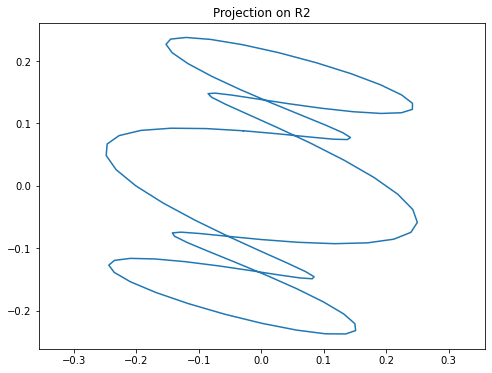

In [5]:
projection_r2 = projection_matrix(size=(4,2)) @ data_r4
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(projection_r2[0, :], projection_r2[1, :])
ax.axis('equal')
ax.set_title(f"Projection on R2")
fig.show()

We can see projection in $R^2$ has intersections, so it doesn't have the same topology as the circle.

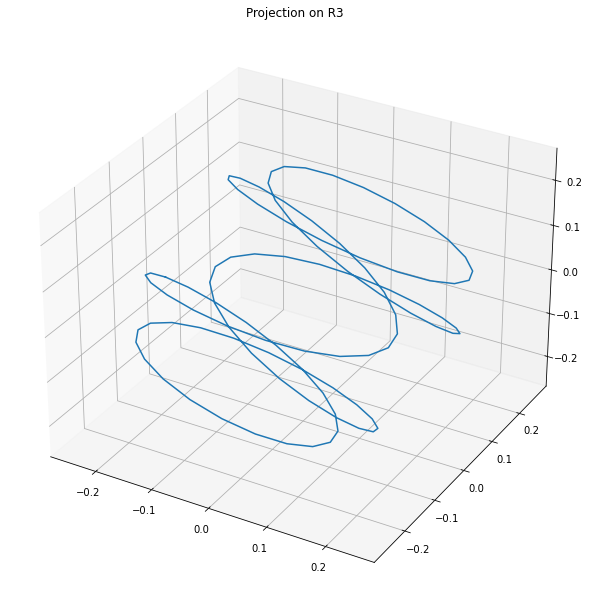

In [6]:
projection_r3 = projection_matrix(size=(4,3)) @ data_r4
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(
    projection_r3[0, :],
    projection_r3[1, :],
    projection_r3[2, :],
)
ax.set_title(f"Projection on R3")
fig.show()

It's possible to run the code several times (due the randomness) to conclude it preserves the topology. Problably in order to preserve the topology we need at least three coordinates, since more coordinates will allow more flexibility for the projection.

## Exercise 02

In [7]:
def geodesic_dist(theta1, theta2):
    d1 = np.abs(theta1 - theta2)
    d2 = 2 * np.pi - np.abs(theta1 - theta2)
    return np.min([d1, d2])

In [8]:
def mmds(D, k=None):
    N, _ = D.shape
    E = D ** 2
    G = (
            - (np.identity(N) - np.ones(shape=(N, N)) / N)
            @ E
            @ (np.identity(N) - np.ones(shape=(N, N)) / N) / 2
    )
    W, V = np.linalg.eig(G)
    if k is not None:
        W = W[:k]
        V = V[:, :k]
    X = sqrtm(np.diag(W)) @ V.T
    return X, W

In [9]:
D = np.asarray(
    [
        [geodesic_dist(theta1, theta2) for theta1 in theta]
        for theta2 in theta
    ]
)
X, D_eigenvalues = mmds(D)

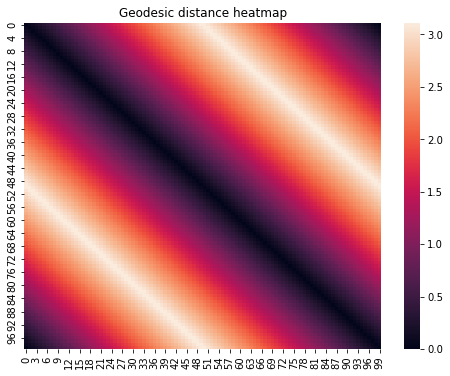

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(D)
ax.set_title("Geodesic distance heatmap")
fig.show()

### (a)

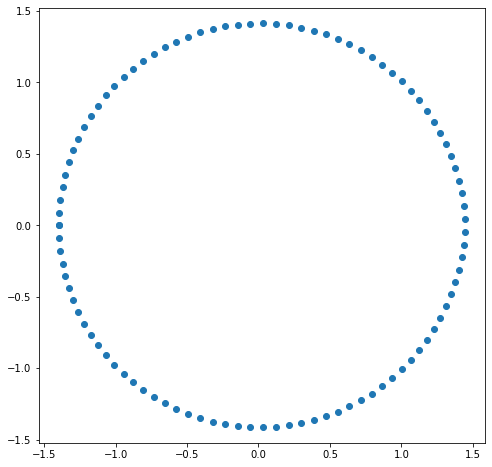

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[0, :].real, X[1, :].real)
ax.axis('equal')
fig.show()

Radius aren't the same, so it is not a isometric embedding nor a path isometric embedding.

### (b)

In [13]:
X2, D2_eigenvalues = mmds(D, k=2)
X4, D4_eigenvalues = mmds(D, k=4)
X10, D10_eigenvalues = mmds(D, k=10)

In [14]:
X2_euclidean_dist = euclidean_distances(X2.T)
X4_euclidean_dist = euclidean_distances(X4.real.T)
X10_euclidean_dist = euclidean_distances(X10.real.T)

In [15]:
# 2 coordinates
np.mean(np.abs(D - X2_euclidean_dist) ** 2)

0.08721553061122583

In [16]:
# 4 coordinates
np.mean(np.abs(D - X4_euclidean_dist) ** 2)

0.08721553061122583

In [17]:
# 10 coordinates
np.mean(np.abs(D - X10_euclidean_dist) ** 2)

0.2039398230000657

Mean square error between Euclidean and Geodesic distances are low, however they aren't small enough for concluding they match. According only to mean square error we should be careful, so to tell they don't match is the most accurate.

### (c)

In [18]:
def plot_isomap_coords(X, coordinates=[0, 1, 2]):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    c1, c2, c3 = coordinates
    ax.scatter(
        X[c1, :].real,
        X[c2, :].real,
        X[c3, :].real,
        alpha=1
    )
    title_coordinates = "-".join([str(i + 1) for i in coordinates])
    title = f"{title_coordinates} Isomap coordinates"
    ax.set_title(title)
    ax.set_xlabel(f"{c1 + 1}-th Coordinate")
    ax.set_ylabel(f"{c2 + 1}-th Coordinate")
    ax.set_zlabel(f"{c3 + 1}-th Coordinate")
    plt.show()

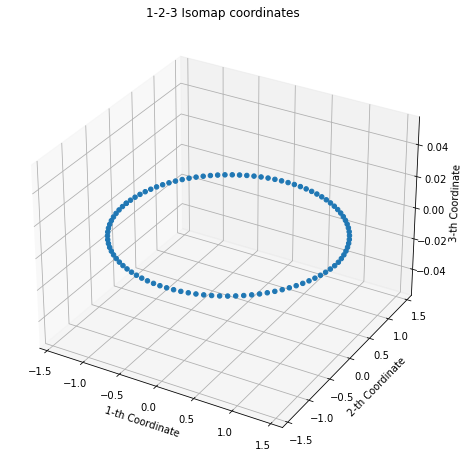

In [19]:
plot_isomap_coords(X, coordinates=[0, 1, 2])

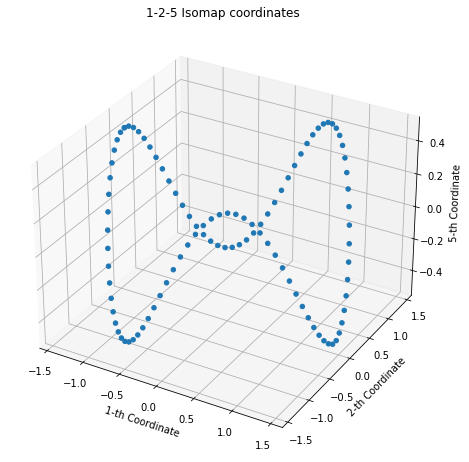

In [20]:
plot_isomap_coords(X, coordinates=[0, 1, 4])

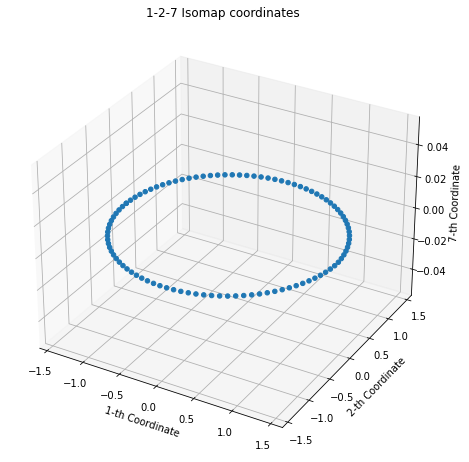

In [21]:
plot_isomap_coords(X, coordinates=[0, 1, 6])

These coordinates aren't zero because our guess Euclidean and Geodesic distances don't match was right.

### (d)

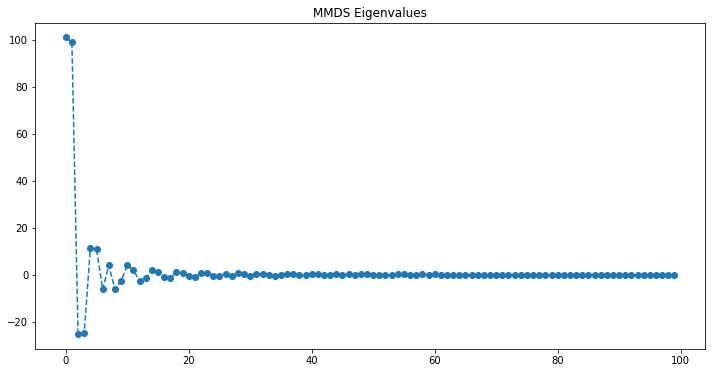

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(D_eigenvalues, "--o")
ax.set_title("MMDS Eigenvalues") 
fig.show()

According to the above plot there are negative eigenvalues, then the _Gram_ matrix is not positive definite, so it isn't possible to find $N$ points in any Euclidean space whose pairwise distances match those in the matrix $D$.

## Exercise 3

In [62]:
theta = np.linspace(0, 3 / 2 * np.pi, N)
D = np.asarray(
    [
        [np.abs(theta1 - theta2) for theta1 in theta]
        for theta2 in theta
    ]
)
X, D_eigenvalues = mmds(D)

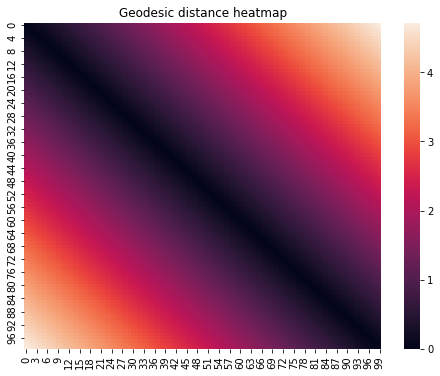

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(D)
ax.set_title("Geodesic distance heatmap")
fig.show()

### (a)

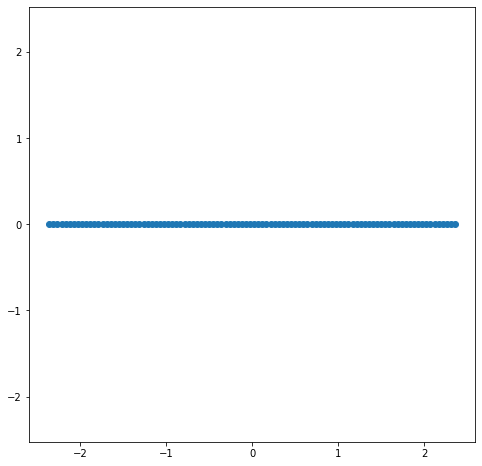

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[0, :].real, X[1, :].real)
ax.axis('equal')
fig.show()

### (b)

In [65]:
X2, D2_eigenvalues = mmds(D, k=2)
X4, D4_eigenvalues = mmds(D, k=4)
X10, D10_eigenvalues = mmds(D, k=10)

In [66]:
X2_euclidean_dist = euclidean_distances(X2.real.T)
X4_euclidean_dist = euclidean_distances(X4.real.T)
X10_euclidean_dist = euclidean_distances(X10.real.T)

In [67]:
np.mean(np.abs(D - X2_euclidean_dist) ** 2)

7.703866966744944e-31

In [68]:
np.mean(np.abs(D - X4_euclidean_dist) ** 2)

3.151315057825338e-30

In [69]:
np.mean(np.abs(D - X10_euclidean_dist) ** 2)

1.8702050122650676e-29

In this case we can say they match, mean square error is almost zero.

### (c)

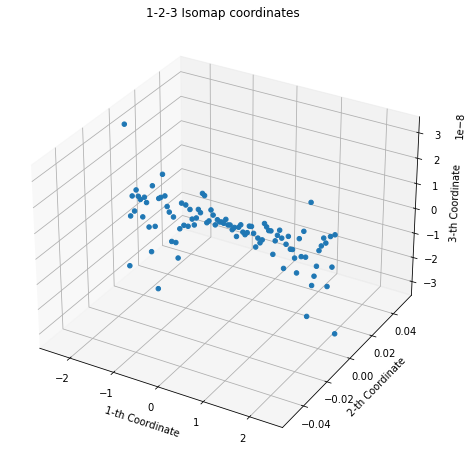

In [70]:
plot_isomap_coords(X, coordinates=[0, 1, 2])

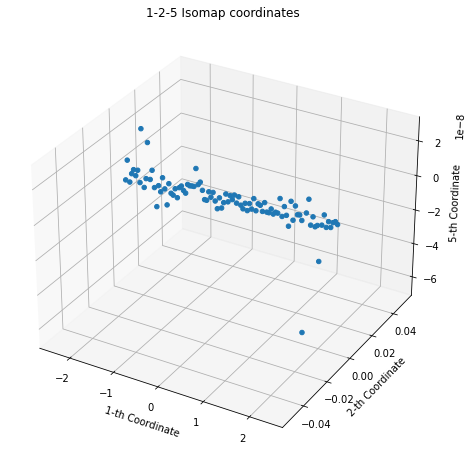

In [33]:
plot_isomap_coords(X, coordinates=[0, 1, 4])

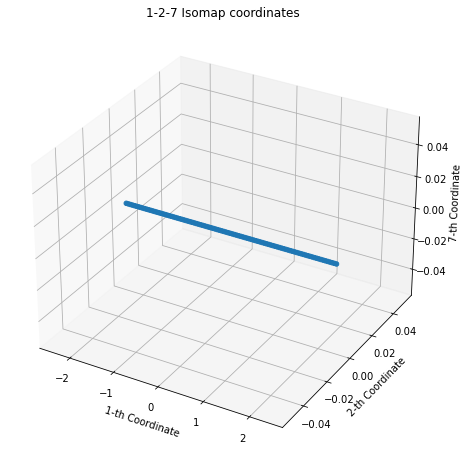

In [34]:
plot_isomap_coords(X, coordinates=[0, 1, 6])

Since we actually got an embedding the values of the 3, 5 and 7th are close to zero as well.

### (d)

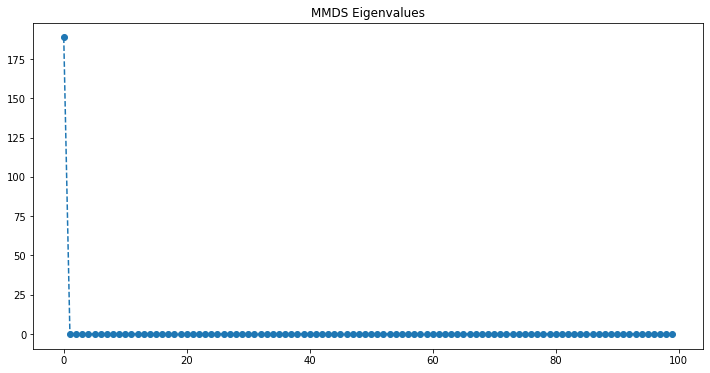

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(D_eigenvalues.real, "--o")
ax.set_title("MMDS Eigenvalues") 
fig.show()

Gram matrix is actually positive definite (actually it's close to be semi-positive definite since eigenvalues are not completely equal to zero).

## Exercise 4

In [36]:
import sympy
from sympy import sin, cos, Matrix
from sympy.abc import theta, phi, k

In [37]:
X3 = Matrix([cos(theta), sin(theta), cos(phi), sin(phi)])
J3 = X3.jacobian(Matrix([theta, phi]))
J3

Matrix([
[-sin(theta),         0],
[ cos(theta),         0],
[          0, -sin(phi)],
[          0,  cos(phi)]])

In [38]:
J3.T @ J3

Matrix([
[sin(theta)**2 + cos(theta)**2,                         0],
[                            0, sin(phi)**2 + cos(phi)**2]])

In [39]:
X4 = (
    Matrix(
        [
            cos(theta), sin(theta),
            cos(k * theta), sin(k * theta),
            cos(phi), sin(phi),
            cos(k * phi), sin(k *phi)
        ]
    ) / sympy.sqrt(1 + k ** 2)
)
J4 = X4.jacobian(Matrix([theta, phi]))
J4

Matrix([
[    -sin(theta)/sqrt(k**2 + 1),                            0],
[     cos(theta)/sqrt(k**2 + 1),                            0],
[-k*sin(k*theta)/sqrt(k**2 + 1),                            0],
[ k*cos(k*theta)/sqrt(k**2 + 1),                            0],
[                             0,     -sin(phi)/sqrt(k**2 + 1)],
[                             0,      cos(phi)/sqrt(k**2 + 1)],
[                             0, -k*sin(k*phi)/sqrt(k**2 + 1)],
[                             0,  k*cos(k*phi)/sqrt(k**2 + 1)]])

In [40]:
J4.T @ J4

Matrix([
[k**2*sin(k*theta)**2/(k**2 + 1) + k**2*cos(k*theta)**2/(k**2 + 1) + sin(theta)**2/(k**2 + 1) + cos(theta)**2/(k**2 + 1),                                                                                                               0],
[                                                                                                                      0, k**2*sin(k*phi)**2/(k**2 + 1) + k**2*cos(k*phi)**2/(k**2 + 1) + sin(phi)**2/(k**2 + 1) + cos(phi)**2/(k**2 + 1)]])

Since $\cos^2(x) + \sin^2(x) = 1$ is clear that they are path isometric embeddings.

## Exercise 5

In [41]:
t = np.linspace(0, 2 * np.pi, 50)
t1, t2 = np.meshgrid(t, t)
theta = t1.ravel()
phi = t2.ravel()

In [42]:
def phi3(theta, phi):
    values = np.array([np.cos(theta), np.sin(theta), np.cos(phi), np.sin(phi)])
    return values

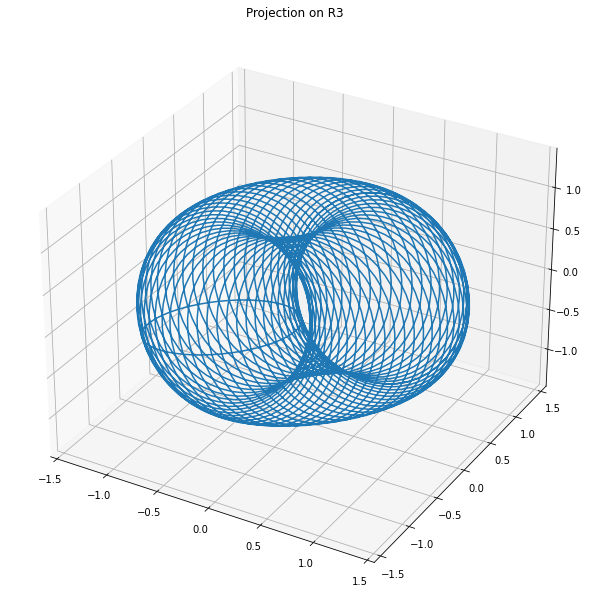

In [43]:
projection_phi3 = projection_matrix(size=(4, 3)) @ phi3(theta, phi)
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(
    projection_phi3[0, :],
    projection_phi3[1, :],
    projection_phi3[2, :],
)
ax.set_title(f"Projection on R3")
fig.show()

In [44]:
def phi4(theta, phi, k):
    values = np.array(
        [
            np.cos(theta), np.sin(theta),
            np.cos(k * theta), np.sin(k * theta),
            np.cos(phi), np.sin(phi),
            np.cos(k * phi), np.sin(k * phi)
        ]
    )
    return values / np.sqrt(1 + k ** 2)

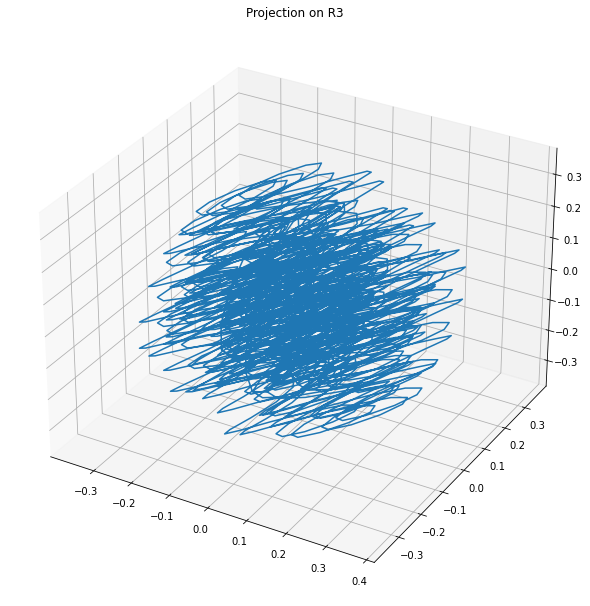

In [45]:
projection_phi4 = projection_matrix(size=(8, 3)) @ phi4(theta, phi, k=5)
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(
    projection_phi4[0, :],
    projection_phi4[1, :],
    projection_phi4[2, :],
)
ax.set_title(f"Projection on R3")
fig.show()

## Exercise 6

In [46]:
def phi5(theta, phi):
    values = values = np.array(
        [np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)]
    )
    return values

def hemisphere_geodesic_dist(y1, y2):
    value = y1 @ y2
    if value > 1:
        value = 1
    elif value < -1:
        value = -1
    return np.arccos(value)

In [47]:
theta = np.linspace(0, 2 * np.pi, 50, endpoint=False)
phi = np.linspace(1 / N, np.pi / 2, 50, endpoint=False)
theta_mesh, phi_mesh = np.meshgrid(theta, phi)
theta_mesh = theta_mesh.ravel()
phi_mesh = phi_mesh.ravel()
data = phi5(theta_mesh, phi_mesh)

In [48]:
D = np.asarray(
    [
        [hemisphere_geodesic_dist(y1, y2) for y1 in data.T]
        for y2 in data.T
    ]
)

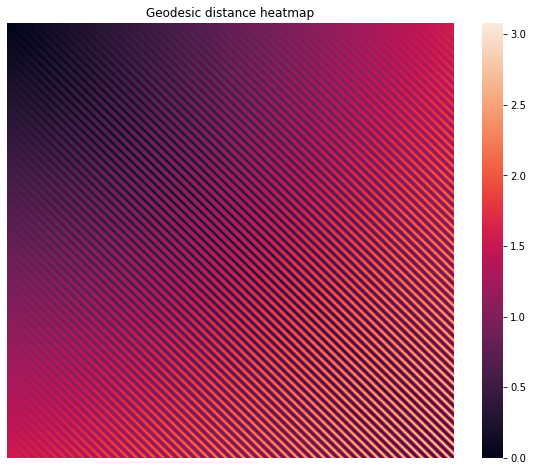

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(D, xticklabels=False, yticklabels=False)
ax.set_title("Geodesic distance heatmap")
fig.show()

In [50]:
X, D_eigenvalues = mmds(D, k=3)

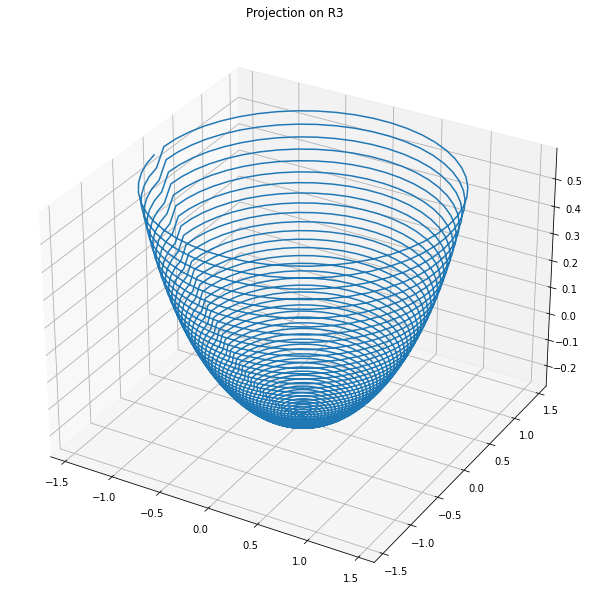

In [51]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(
    X[0, :].real,
    X[1, :].real,
    X[2, :].real,
)
ax.set_title(f"Projection on R3")
fig.show()

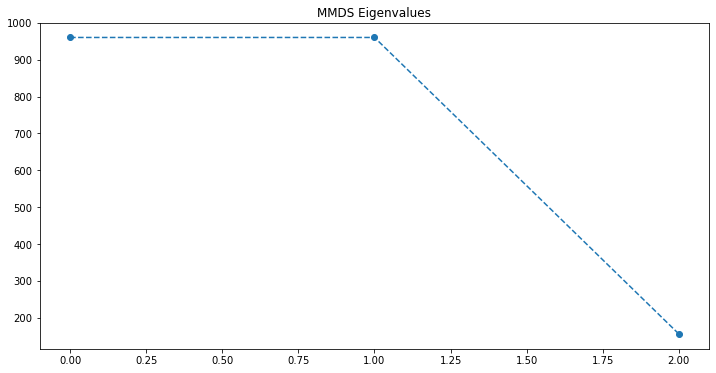

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(D_eigenvalues.real, "--o")
ax.set_title("MMDS Eigenvalues") 
fig.show()

## Exercise 7

In [73]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path

In [74]:
def phi6(theta, phi):
    values = np.array(
        [(1 + theta) * np.cos(theta), (1 + theta) * np.sin(theta), 8 * phi]
    )
    return values

In [75]:
theta = np.linspace(0, 2 * np.pi, 50, endpoint=False)
data = phi6(theta_mesh, phi_mesh)
epsilon = 2
D = euclidean_distances(data.T)
D[D > epsilon] = 0
D = csr_matrix(D)
D = shortest_path(csgraph=D, directed=True)

In [76]:
X, D_eigenvalues = mmds(D, k=3)

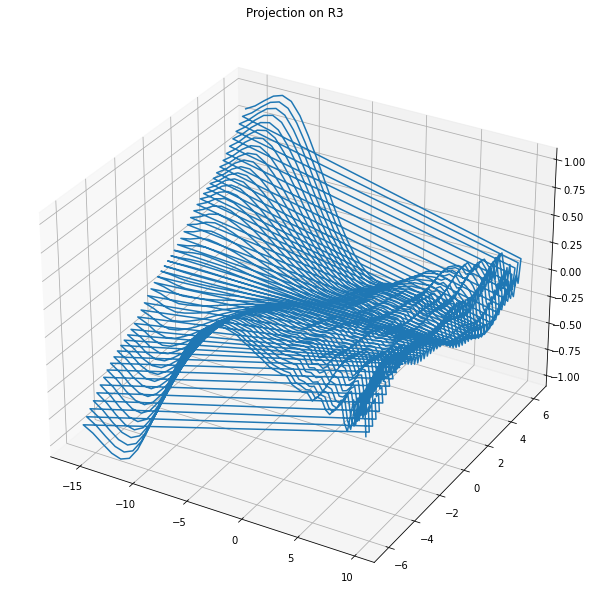

In [77]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(
    X[0, :].real,
    X[1, :].real,
    X[2, :].real,
)
ax.set_title(f"Projection on R3")
fig.show()

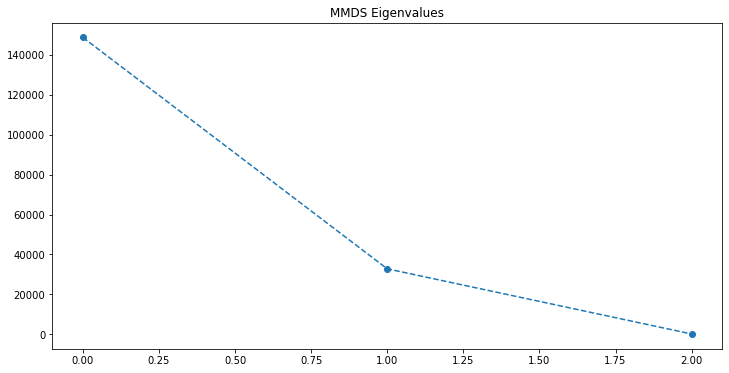

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(D_eigenvalues.real, "--o")
ax.set_title("MMDS Eigenvalues") 
fig.show()

We got positive eigenvalues, however the first one is larger than the other two, we could consider only the first two for good approximations.